# Visualizing in 3D

- It is nice to visualize brain images in 2D, but a brain is a 3D structure. 
- It would be really useful to visualize and interact with the brain in 3D. 

- We have learned to use nibabel to read brain images, 
- A number of Python and javascript libraries make it easy to generate 3D images.

    1. [IPyvolume](https://ipyvolume.readthedocs.io/en/latest/index.html) based on [threejs](https://threejs.org/)
    2. [Mayavi](http://docs.enthought.com/mayavi/mayavi/)
    3. [Pysurfer](https://pysurfer.github.io/) based on Mayavi

In this notebook we focus on 1. We will cover basic Mayavi in a separate notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import nibabel as nb
import ipyvolume
import ipyvolume.pylab as p3
import numpy as np

Before we use any surface based on objects, most images in brain imaging are 3D volumes. Volume rendering techniques have been around for a long time. Now one can use them quite easily in the browser.

The following cell loads one of the structural images and uses levels and opacity to create a translucent look through the volume.

In [2]:
V = nb.load('/data/ds000114/derivatives/fmriprep/sub-01/anat/sub-01_t1w_preproc.nii.gz').get_data()
ipyvolume.quickvolshow(V, level=[0.25, 0.5, 0.75], opacity=0.03, level_width=0.1, 
                       width=600, height=600)

A Jupyter Widget

As you can see by playing with the above image that file has been defaced for anonymization. We will now download a full image to see if we can easily view the "face" from the MR scan.

In [3]:
from urllib.request import urlretrieve
urlretrieve('https://osf.io/7jbpr/download?version=1', '/tmp/T1.nii.gz')

('/tmp/T1.nii.gz', <http.client.HTTPMessage at 0x7fd0c1724a20>)

In [4]:
img = nb.load('/tmp/T1.nii.gz')
print("Dimensions", img.shape)
print("Pixel dimensions", img.header.get_zooms())
V = img.get_data()

Dimensions (176, 256, 256)
Pixel dimensions (0.99999803, 1.0, 1.0)


In [5]:
fig = p3.figure(width=600, height=600)
fig.style = {'axes': {'color': 'black',
  'label': {'color': 'black'},
  'ticklabel': {'color': 'black'},
  'visible': False},
 'background-color': 'white',
 'box': {'visible': False}}
fig.camera_fov = 1
fig.xlim = (-100, 100)
fig.ylim = (-100, 100)
fig.zlim = (-100, 100)

fig.anglex = 0
fig.angley = 0
fig.anglez = -np.pi/2
vol = p3.volshow(V)
p3.show()

/opt/conda/envs/neuro/lib/python3.6/site-packages/ipyvolume/serialize.py:66: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


A Jupyter Widget

In [6]:
fig.trait_names

<bound method HasTraits.trait_names of Figure(anglez=-1.5707963267948966, camera_fov=1.0, data_max=1611.9046031311154, height=600, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], style={'axes': {'color': 'black', 'label': {'color': 'black'}, 'ticklabel': {'color': 'black'}, 'visible': False}, 'background-color': 'white', 'box': {'visible': False}}, tf=TransferFunctionWidgetJs3(level3=0.9), volume_data=array([[[ 24.00578153,  25.99806463,  28.99878732, ...,  28.99878732,
          24.98962504,   0.        ],
        [ 28.99878732,  30.99107042,  33.99179311, ...,  21.98890235,
          27.00650422,   0.        ],
        [ 33.00794961,  33.00794961,  21.00505884, ...,  30.00722691,
          24.98962504,   0.        ],
        ..., 
        [ 16.01205305,  18.00433615,  24.98962504, ...,  36.0086723 ,
          21.00505884,   0.        ],
  

## Exercise 1:

Turn this image into a face

- adjust the transfer function using `level`, `opacity`, and `max_opacity`
- adjust lighting using `lighting` and `diffuse_coefficient`
- turn of controls after you are done adjusting
- fix the aspect ratio based on dimensions
  The image is always rendered into a cube, so extend the volume with zeros to create a uniform cube
- use `downscale` to do faster rendering

In [7]:
fig = p3.figure(width=600, height=600)
fig.style = {'axes': {'color': 'black',
  'label': {'color': 'black'},
  'ticklabel': {'color': 'black'},
  'visible': False},
 'background-color': 'white',
 'box': {'visible': False}}
fig.camera_fov = 1

# Set viewing angle
fig.anglex = -2.5287287502882
fig.angley = 0.432399229463336
fig.anglez = -1.7057381623311114

# Turn volume into cube
Vnew = np.concatenate((np.zeros((256-176, 256, 256)), V), axis=0)

vol = p3.volshow(Vnew, level=[0.21, 0.30], opacity=[0.2, 1.0], max_opacity=1, lighting=True, downscale=2,
                 diffuse_coefficient=0.5, controls=False)
p3.show()

/opt/conda/envs/neuro/lib/python3.6/site-packages/ipyvolume/serialize.py:66: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


A Jupyter Widget

In [8]:
# Create your solution here

Another way to generate a face is to use the isosurface function. This creates a surface connecting voxels left in the image after thresholding at a given value.

Play with the slider to find a value that recovers most of the face.

In [9]:
fig = p3.figure(width=600, height=600)
fig.style = {'axes': {'color': 'black',
  'label': {'color': 'black'},
  'ticklabel': {'color': 'black'},
  'visible': False},
 'background-color': 'white',
 'box': {'visible': False}}
fig.camera_fov = 1
Vnew = np.concatenate((np.zeros((256-176, 256, 256)), V), axis=0)
# Set viewing angle
fig.anglex = -1.4971217646597959
fig.angley = 0.45647865940768106
fig.anglez = 3.0730970695793047
vol = p3.plot_isosurface(Vnew, 200)
p3.show()

A Jupyter Widget

## Exercise 2:

Can you use this approach to extract the brain from this image? 

If yes, how? If no, why not?

As can be seen with playing around with the threshold, there is no specific value that separates the skull from the brain in terms of intensities. 

IPyvolume can also be used to plot meshes. In fact the isosurface output above is a triangular mesh.

In [10]:
# Here is an example from the IPYVolume documentation

s = 1/2**0.5

# Create 4 vertices for the tetrahedron
x = np.array([1.,  -1, 0,  0])
y = np.array([0,   0, 1., -1])
z = np.array([-s, -s, s,  s])

# and 4 surfaces (triangles or faces), where the number refer to the vertex index
triangles = [(0, 1, 2), (0, 1, 3), (0, 2, 3), (1,3,2)]

In [11]:
fig = p3.figure()
# we draw the tetrahedron
p3.plot_trisurf(x, y, z, triangles=triangles, color='orange')
# and also mark the vertices
p3.scatter(x, y, z, marker='sphere', color='blue')
p3.xyzlim(-2, 2)
p3.show()

A Jupyter Widget

## Read the surface geometry of a subject using nibabel

In [12]:
data_lh = nb.freesurfer.read_geometry('/data/ds000114/derivatives/freesurfer/sub-01/surf/lh.pial')
data_rh = nb.freesurfer.read_geometry('/data/ds000114/derivatives/freesurfer/sub-01/surf/rh.pial')

In [13]:
fig = p3.figure(width=600, height=600)
fig.camera_fov = 1
fig.style = {'axes': {'color': 'black',
  'label': {'color': 'black'},
  'ticklabel': {'color': 'black'},
  'visible': False},
 'background-color': 'white',
 'box': {'visible': False}}
fig.xlim = (-100, 100)
fig.ylim = (-100, 100)
fig.zlim = (-100, 100)

# plot each hemisphere
x, y, z = data_lh[0][:, 0], data_lh[0][:, 1], data_lh[0][:, 2]
p3.plot_trisurf(x, y, z, triangles=data_lh[1], color='gray')

x, y, z = data_rh[0][:, 0], data_rh[0][:, 1], data_rh[0][:, 2]
p3.plot_trisurf(x, y, z, triangles=data_rh[1], color='gray')

p3.show()

A Jupyter Widget

## Exercise 3: 

Plot the smoothwm surfaces of subject 1.

In [14]:
data_lhs = nb.freesurfer.read_geometry('/data/ds000114/derivatives/freesurfer/sub-01/surf/lh.smoothwm')
data_rhs = nb.freesurfer.read_geometry('/data/ds000114/derivatives/freesurfer/sub-01/surf/rh.smoothwm')

fig = p3.figure(width=600, height=600)
fig.camera_fov = 1
fig.style = {'axes': {'color': 'black',
  'label': {'color': 'black'},
  'ticklabel': {'color': 'black'},
  'visible': False},
 'background-color': 'white',
 'box': {'visible': False}}
fig.xlim = (-100, 100)
fig.ylim = (-100, 100)
fig.zlim = (-100, 100)

# plot each hemisphere
x, y, z = data_lhs[0][:, 0], data_lhs[0][:, 1], data_lhs[0][:, 2]
p3.plot_trisurf(x, y, z, triangles=data_lhs[1], color='gray')

x, y, z = data_rhs[0][:, 0], data_rhs[0][:, 1], data_rhs[0][:, 2]
p3.plot_trisurf(x, y, z, triangles=data_rhs[1], color='gray')

p3.show()

A Jupyter Widget

In [15]:
# Create solution here

# load data

# extract and plot each hemisphere

The dataset we are using also has the surfaces stored in `gifti` format under `derivatives/fmriprep`. In addition, the freesurfer output for these subjects also has the parcellation files. Nibabel can read these files.

In [16]:
data_lh = [val.data for val in nb.load('/data/ds000114/derivatives/fmriprep/sub-01/anat/sub-01_t1w_smoothwm.l.surf.gii').darrays]
data_rh = [val.data for val in nb.load('/data/ds000114/derivatives/fmriprep/sub-01/anat/sub-01_t1w_smoothwm.r.surf.gii').darrays]

# Read the annot files and extract the colors.
annot_rh = nb.freesurfer.read_annot('/data/ds000114/derivatives/freesurfer/sub-01/label/rh.aparc.dktatlas.annot')
colors_rh = annot_rh[1][annot_rh[0], 0:3]/255.
annot_lh = nb.freesurfer.read_annot('/data/ds000114/derivatives/freesurfer/sub-01/label/lh.aparc.dktatlas.annot')
colors_lh = annot_lh[1][annot_lh[0], 0:3]/255.

In [17]:
fig = p3.figure(width=600, height=600)
# we draw the tetrahedron
x, y, z = data_lh[0][:, 0], data_lh[0][:, 1], data_lh[0][:, 2]
p3.plot_trisurf(x, y, z, triangles=data_lh[1], color=colors_lh)
x, y, z = data_rh[0][:, 0], data_rh[0][:, 1], data_rh[0][:, 2]
p3.plot_trisurf(x, y, z, triangles=data_rh[1], color=colors_rh)
fig.camera_fov = 1
fig.xlim = (-100, 100)
fig.ylim = (-100, 100)
fig.zlim = (-100, 100)
p3.show()

A Jupyter Widget

We can load the functional time series preprocessed by fmriprep

In [18]:
lh_func = nb.load('/data/ds000114/derivatives/fmriprep/sub-02/ses-test/func/sub-02_ses-test_task-fingerfootlips_bold_space-fsaverage5.l.func.gii')
data = np.vstack([val.data for val in lh_func.darrays]).T

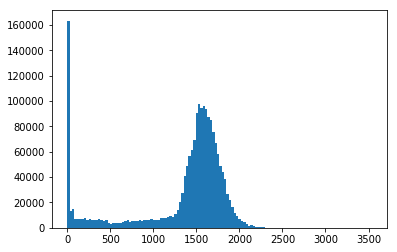

In [19]:
plt.hist(data.flatten(), 128);

In [20]:
data[data<500] = np.nan
mean_val = np.nanmean(data)
data_change = (data - mean_val)/mean_val
mean_epi = np.nanmedian(data, axis=1) - mean_val
mean_std = np.nanstd(mean_epi)
mean_epi[np.isnan(mean_epi)] = 0.
data[np.isnan(data)] = 0.
print(mean_epi.shape, mean_val, mean_std)

(10242,) 1542.41 288.133


/opt/conda/envs/neuro/lib/python3.6/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


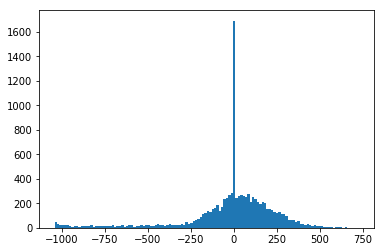

In [21]:
plt.hist(mean_epi, 128);

In [22]:
def vals2colors(vals):
    cmap = np.vstack((plt.cm.viridis(range(256)), plt.cm.cool(range(256))))
    indices = 256 + (255 * vals).astype(int)
    return cmap[indices, 0:3]

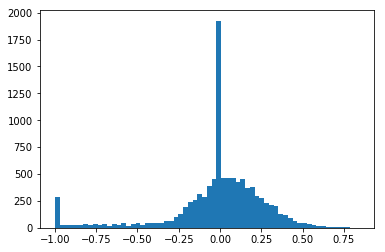

In [23]:
epi_vals = np.minimum(np.maximum(mean_epi/(3 * mean_std), -1), 1)
colors = vals2colors(epi_vals)
plt.hist(epi_vals, 64);

If you do not have lh.smoothwm you can retrieve it using the following command

```
!datalad get /data/ds000114/derivatives/freesurfer/fsaverage5/surf/lh.smoothwm
```

In [24]:
data_fs = nb.freesurfer.read_geometry('/data/ds000114/derivatives/freesurfer/fsaverage5/surf/lh.smoothwm')

fig = p3.figure(width=600, height=600)
# we draw the tetrahedron
x, y, z = data_fs[0][:, 0], data_fs[0][:, 1], data_fs[0][:, 2]
p3.plot_trisurf(x, y, z, triangles=data_fs[1], color=colors)
fig.camera_fov = 1
fig.anglex = np.pi/2
fig.angley = -np.pi/2
fig.xlim = (-100, 100)
fig.ylim = (-100, 100)
fig.zlim = (-100, 100)
p3.show()

A Jupyter Widget

## Exercise 4:

Plot the mean activity of the functional time series (stored as gifti) on the surface of the fsaverage5 mesh. The fmriprep routine generates these surface-based timeseries files.

- extract principal components of the data scikit-learn 
- plot the first two components on the surface of the mesh


In [25]:
from sklearn.decomposition import PCA
foo = PCA(n_components=2).fit_transform(data)

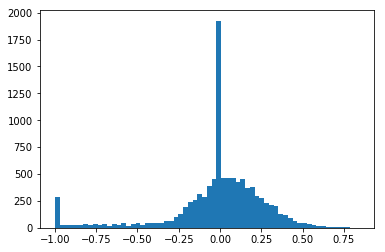

In [26]:
comp_vals = np.minimum(np.maximum(foo[:, 0]/(3 * np.std(foo[:, 0])), -1), 1)
colors = vals2colors(comp_vals)
plt.hist(epi_vals, 64);

In [27]:
data_fs = nb.freesurfer.read_geometry('/data/ds000114/derivatives/freesurfer/fsaverage5/surf/lh.smoothwm')

fig = p3.figure(width=600, height=600)
# we draw the tetrahedron
x, y, z = data_fs[0][:, 0], data_fs[0][:, 1], data_fs[0][:, 2]
p3.plot_trisurf(x, y, z, triangles=data_fs[1], color=colors)
fig.camera_fov = 1
fig.anglex = np.pi/2
fig.angley = -np.pi/2
fig.xlim = (-100, 100)
fig.ylim = (-100, 100)
fig.zlim = (-100, 100)
p3.show()

A Jupyter Widget

In [ ]:
# Look up how to use PCA from scikit learn

# Follow the steps from above to plot the two components